In [224]:
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
def generate_two_spirals_dataset(n_points, noise=.5):
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points, 1) * noise
    return (
        np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
        np.hstack((np.zeros(n_points), np.ones(n_points)))
    )


def split_dataset(x, y, perc):
    num = round(len(x) * perc)
    return x[:num], y[:num], x[num:], y[num:]


def get_two_spirals_data(n_points, noise=0.5):
    # quick fix to distribution bug
    x1, y1 = generate_two_spirals_dataset(700, noise=0.1)
    x2, y2 = generate_two_spirals_dataset(700, noise=0.1)
    indices1, indices2 = torch.arange(0, x1.shape[0]), torch.arange(x2.shape[0])
    np.random.shuffle(indices1)
    np.random.shuffle(indices2)
    x1, y1 = x1[indices1], y1[indices1]
    x2, y2 = x2[indices2], y2[indices2]

    _, _, x_train, y_train = split_dataset(x1, y1, 0.9)
    _, _, x_test, y_test = split_dataset(x2, y2, 0.9)
    return x_train, y_train, x_test, y_test

In [258]:
x_train, y_train, x_test, y_test = get_two_spirals_data(
    1500, noise=0.5)


In [259]:
print(list(y_train).count(0) / len(y_train))
print(len(y_train))
print(list(y_test).count(0) / len(y_test))
print(len(y_test))

0.5
140
0.5142857142857142
140


In [260]:
def plot_spiral_dataset(x, y):
    plt.title('Spiral dataset')
    one = x[y == 0, :]
    two = x[y == 1, :]
    plt.scatter(*zip(*one), c='red', label='class 1')
    plt.scatter(*zip(*two), c='darkorange', label='class 2')

    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()

    plt.legend()
    plt.show()

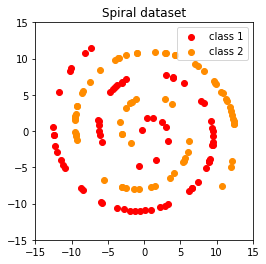

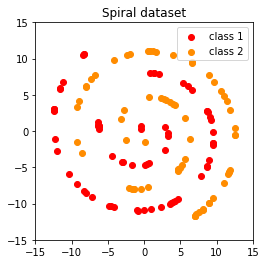

In [261]:
plot_spiral_dataset(x_train, y_train)
plot_spiral_dataset(x_test, y_test)

In [273]:
def save_dataset(filename, xs, ys):
    with open(filename, 'w') as f:
        for x, y in zip(xs, ys):
            f.write("{0} {1} {2}".format(x[0], x[1], int(y)))

In [274]:
save_dataset("train_dataset.txt", x_train, y_train)
save_dataset("test_dataset.txt", x_test, y_test)